In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_5081f81d79d14bc98585e4995f36ea4f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ayQ-QLPt1QO3ZO_iHtnBUv8N2Lh6qRLO8LZ4_Fi-p3KG',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_2 = client_5081f81d79d14bc98585e4995f36ea4f.get_object(Bucket='plantdiseaseclassification-donotdelete-pr-3jizmpkeyw1kkv', Key='fruit-dataset.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [2]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True, vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1)

In [4]:
ls

fruit-dataset/


In [5]:
pwd

'/home/wsuser/work'

In [8]:
x_train=train_datagen.flow_from_directory(r"/home/wsuser/work/fruit-dataset/train",target_size=(128,128),class_mode='categorical',batch_size=32)
x_test=test_datagen.flow_from_directory(r"/home/wsuser/work/fruit-dataset/test",target_size=(128,128),class_mode='categorical',batch_size=32)


Found 5384 images belonging to 6 classes.
Found 1686 images belonging to 6 classes.


In [9]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [10]:
#Import keras models and layers

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [11]:
model=Sequential()
model.add(Convolution2D(32,(3,3), input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [14]:
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [15]:
#Fit the model
model.fit_generator(x_train,steps_per_epoch=168,validation_data=x_test, validation_steps=52,epochs=3)

/tmp/wsuser/ipykernel_164/876289031.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=168,validation_data=x_test, validation_steps=52,epochs=3)


Epoch 1/3
168/168 [==============================] - 203s 1s/step - loss: 0.8118 - accuracy: 0.7438 - val_loss: 56.1117 - val_accuracy: 0.8257
Epoch 2/3
168/168 [==============================] - 201s 1s/step - loss: 0.2739 - accuracy: 0.9049 - val_loss: 344.3285 - val_accuracy: 0.5150
Epoch 3/3
168/168 [==============================] - 202s 1s/step - loss: 0.2159 - accuracy: 0.9277 - val_loss: 390.2771 - val_accuracy: 0.5571


In [16]:
model.save('fruit.h5')

In [24]:
ls

fruit-dataset/  fruit.h5


In [26]:
!tar -zcvf FruitDiseaseClassification.tgz fruit.h5

fruit.h5


In [27]:
ls

fruit-dataset/  FruitDiseaseClassification.tgz  fruit.h5


# Test

In [17]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [18]:
#load the model
model=load_model('fruit.h5')

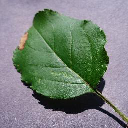

In [19]:
img=image.load_img(r"/home/wsuser/work/fruit-dataset/test/Apple___Black_rot/2a4cbd85-e831-4ec4-8acf-49cea51eeb5f___JR_FrgE.S 2900.JPG",target_size=(128,128))
img

In [33]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

In [34]:
y=np.argmax(model.predict(x),axis=1)

In [35]:
index=['Apple___Black_rot', 'Apple___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy','Peach___Bacterial_spot',
 'Peach___healthy']

In [36]:
index[y[0]]

'Apple___Black_rot'

In [39]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 19.7 MB/s eta 0:00:01


In [37]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"79usIO-T1tcICWjvzF9sxfShUpnN9UWqIn0B960NTJlE"
}

In [38]:
client=APIClient(wml_credentials)

In [39]:
client

In [40]:
def guid_space_name(client, PlantDiseaseDeploy):
    space=client.spaces.get_details()
    return (next(item for item in space ['resources'] if item ['entity']['name']==PlantDiseaseDeploy)['metadata']['id']) 

In [41]:
space_uid=guid_space_name(client, 'PlantDiseaseDeploy')
print(space_uid)

0a27f7f4-c72b-418f-a896-a0f57f6b1154


In [42]:
client.set.default_space(space_uid)

'SUCCESS'

In [44]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [48]:
client.software_specifications.list(100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

In [49]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [52]:
model_details = client.repository.store_model(model='FruitDiseaseClassification.tgz',
  meta_props={
              client.repository.ModelMetaNames.NAME:'PlantDiseaseDeploy',
              client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
              client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid } )


In [53]:
model_id=client.repository.get_model_id(model_details)

In [54]:
model_id

'13fa8062-da8c-4f6b-b6bb-d3f1e385af17'

In [57]:
client.repository.download(model_id, 'FruitDisease.tar.gz')

Successfully saved model content to file: 'FruitDisease.tar.gz'


'/home/wsuser/work/FruitDisease.tar.gz'

In [58]:
ls


fruit-dataset/                  FruitDisease.tag.gb  fruit.h5
FruitDiseaseClassification.tgz  FruitDisease.tar.gz
